In [2]:
import pandas as pd
import numpy as np

In [3]:
### Timestamp

# Timestamp dari string

ts = pd.Timestamp('12/2001 2:29:59PM')


In [4]:
pd.Timestamp('1/31/2020')

Timestamp('2020-01-31 00:00:00')

In [5]:
### Period

# Periode bulan
pd.Period('12/2000')

Period('2000-12', 'M')

In [6]:
# Periode day
pd.Period('1/1/1')

Period('2001-01-01', 'D')

In [7]:
### DateTimeIndex

indexTime = [pd.Timestamp('21/1/2010'), pd.Timestamp('23/1/2010'), pd.Timestamp('22/1/2010'), ]

a = pd.Series(['a', 'b', 'c'], indexTime).sort_index()

type(a.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
### Period Index

indexTime = [pd.Period('21/1/2010'), pd.Period('23/1/2010'), pd.Period('22/1/2010'), ]

a = pd.Series(['a', 'b', 'c'], indexTime).sort_index()

type(a.index)

pandas.core.indexes.period.PeriodIndex

In [9]:
# Nyoba numpy randint & Dataframe

data = np.random.randint(0,10,(4,3))
index = ['10 June 2013', 'Sep 31, 2020', '2011-5-31', '30/5/28']

df = pd.DataFrame(data, columns=['anu', 'ani', 'ana'], index=index)
df

,anu,ani,ana
10 June 2013,5,7,7
"Sep 31, 2020",6,4,5
2011-5-31,6,3,7
30/5/28,7,0,5


In [10]:
# Converting to Date Time


data = np.random.randint(0,10,(4,3))
index = ['10 June 2013', 'Sep 29, 2020', '2011-5-31', '30/5/28']

df = pd.DataFrame(data, columns=['anu', 'ani', 'ana'], index=index)
df.index = pd.to_datetime(df.index)
df

,anu,ani,ana
2013-06-10,9,5,0
2020-09-29,2,2,2
2011-05-31,9,8,0
2028-05-30,9,4,2


In [12]:
# Delta time

pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

In [55]:
# Using date time di dataframe

dates = pd.date_range('2020-11-1', periods=9, freq='2W-WED')
dates

DatetimeIndex(['2020-11-04', '2020-11-18', '2020-12-02', '2020-12-16',
               '2020-12-30', '2021-01-13', '2021-01-27', '2021-02-10',
               '2021-02-24'],
              dtype='datetime64[ns]', freq='2W-WED')

In [60]:
# Dataframe bisa gini  juga trnyata

df = pd.DataFrame({'angka 1': np.random.randint(0,10,100), 'angka 2': np.random.randint(10,20,100) })

df['angka 3'] = df['angka 1']+df['angka 2']
df

,angka 1,angka 2,angka 3
0,1,14,15
1,9,17,26
2,3,18,21
3,7,10,17
4,9,10,19
...,...,...,...
95,4,17,21
96,0,15,15
97,0,14,14
98,6,18,24


In [64]:
# Lanjut dataframe tanggal

df = pd.DataFrame({
    'Count 1' : 100 + np.random.randint(-5,10,9).cumsum(),
    'Count 2' : 120 + np.random.randint(-5,10,9)
    }, index=dates)

df

,Count 1,Count 2
2020-11-04,96,116
2020-11-18,98,123
2020-12-02,99,118
2020-12-16,99,120
2020-12-30,103,121
2021-01-13,99,122
2021-01-27,94,125
2021-02-10,91,117
2021-02-24,98,120


In [65]:
# Hari

df.index.day_name()

Index(['Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday'],
      dtype='object')

In [66]:
# Selisih dengan row sebelumnya

df.diff()

,Count 1,Count 2
2020-11-04,NaN,NaN
2020-11-18,2.0,7.0
2020-12-02,1.0,-5.0
2020-12-16,0.0,2.0
2020-12-30,4.0,1.0
2021-01-13,-4.0,1.0
2021-01-27,-5.0,3.0
2021-02-10,-3.0,-8.0
2021-02-24,7.0,3.0


In [67]:
# Jumlah di setiap bulan

df.resample('M').sum()

,Count 1,Count 2
2020-11-30,194,239
2020-12-31,301,359
2021-01-31,193,247
2021-02-28,189,237


In [71]:
# Ambil tahun dan bulan sampai akhir

df['2021-1':]

,Count 1,Count 2
2021-01-13,99,122
2021-01-27,94,125
2021-02-10,91,117
2021-02-24,98,120


In [73]:
# Isi minggu yang kosong

df.asfreq('W', method='ffill')

,Count 1,Count 2
2020-11-08,96,116
2020-11-15,96,116
2020-11-22,98,123
2020-11-29,98,123
2020-12-06,99,118
2020-12-13,99,118
2020-12-20,99,120
2020-12-27,99,120
2021-01-03,103,121
2021-01-10,103,121


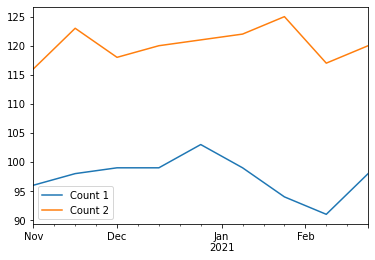

In [74]:
# Langsung buat plot dari dataframe

df.plot()